# Analysis of master flat frames

This notebook takes a look at 2 master flat callibration images taken with a photometric V filter and luminance filter.

Equipment as follows

* C11 + Starizonia F6.3 reducer
* Baader V filter, Baader luminance filter. All 1.25" diameter
* Atik EFW filter wheel
* Atik OAG
* Atik 383L+ CCD camera
* EL panel as light source

#### First load the data from 2 master flats, one from a photometric V filter and one from a luminance filter

In [1]:
import os 
import numpy as np
from astropy import units as u
from ccdproc import CCDData
import matplotlib.pyplot as plt
from matplotlib import cm
from photutils import aperture_photometry, CircularAperture
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline
plt.style.use('seaborn')


v_flat = 'master_flat_2017-03-25PV_1X2017-03-25.fits'
lum_flat = 'master_flat_2017-03-26LUM_1X2017-03-26.fits'

v_filter_data = CCDData.read(v_flat).data
lum_filter_data = CCDData.read(lum_flat).data

In [16]:
print('min {} max {} mean {} std {}'.format(v_filter_data.min(),v_filter_data.max(),v_filter_data.mean(),v_filter_data.std()))
print('min {} max {} mean {} std {}'.format(lum_filter_data.min(),lum_filter_data.max(),lum_filter_data.mean(),lum_filter_data.std()))

min 17397.0 max 51290.8 mean 36050.284107688705 std 3318.8076227323454
min 26706.2 max 51290.8 mean 42319.08450575295 std 3974.271399585068


# V Filter analysis

## Plot the flat for the V filter

The shadow from the OAG can be seen at the top. Some dust moates. A strange formation from an ice crystal also appears at the top right. The optical axis also seems to be slightly to the right of the field.


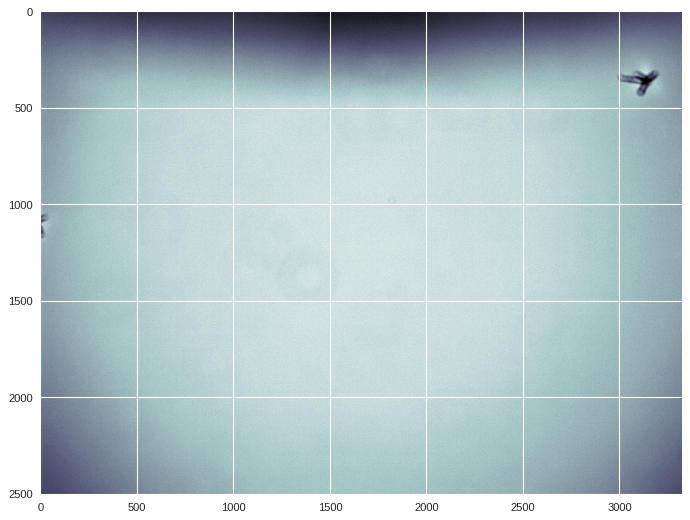

In [2]:
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(v_filter_data, cmap='bone',vmin=21000, vmax=42000)

## Create a surface plot of the V filter flat

ADU values are approx 38,000 at the centre and 24,000 at the edges

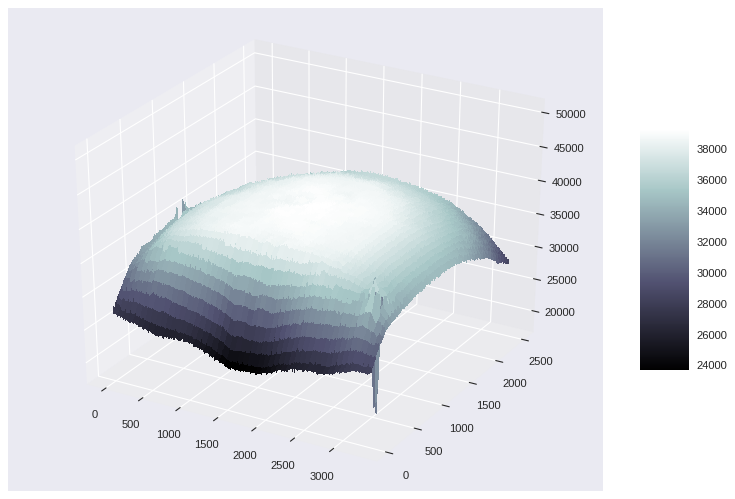

In [3]:
nx, ny = v_filter_data.shape
X, Y = np.meshgrid(range(ny), range(nx))

fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
# fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,v_filter_data, cmap=cm.bone,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Create a diagonal intensity plot for the V filter

This plot shows the ADU values along a diagonal. The optical axis misplacement can be seen clearly.

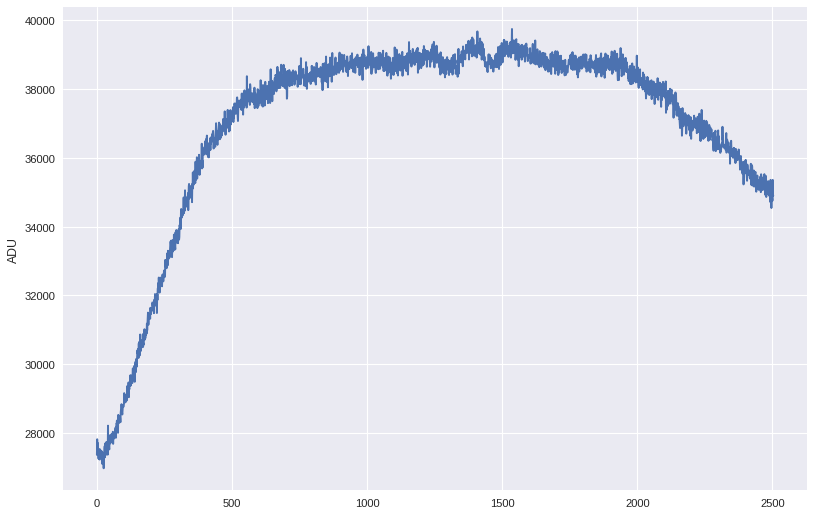

In [4]:
diagonal = np.diagonal(v_filter_data)
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(diagonal)
plt.ylabel('ADU')
plt.show()

# Luminance filter analysis

## Plot the flat for the LUM filter

The shadow from the OAG can be seen at the top. The same dust moates from the V filter are visible which indicates they are on the CCD optical window and not the filter. The strange formation has shrank. This flat was taken about 10min after the above V filter flat.

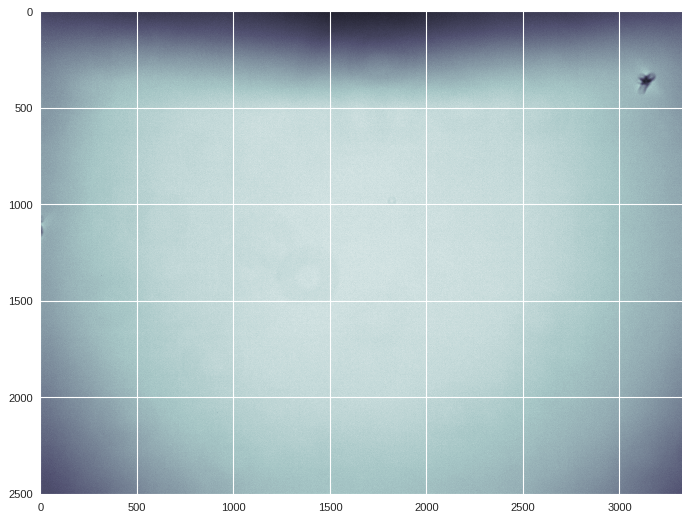

In [5]:
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(lum_filter_data, cmap='bone',vmin=23000, vmax=50000)

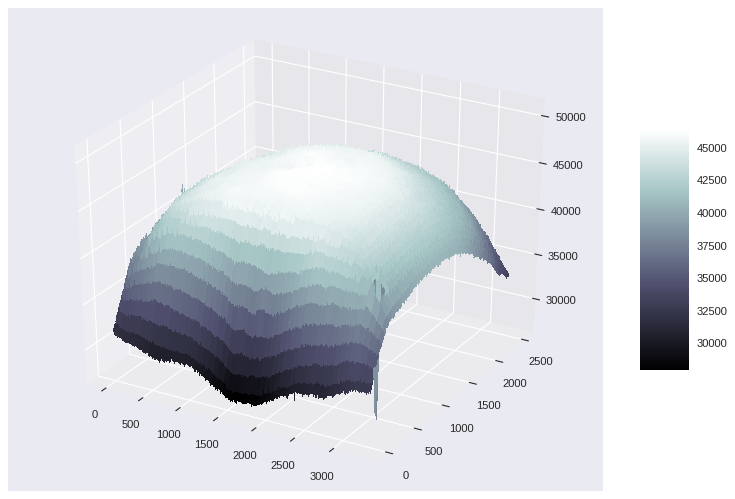

In [6]:
nx, ny = lum_filter_data.shape
X, Y = np.meshgrid(range(ny), range(nx))

fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
# fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,lum_filter_data, cmap=cm.bone,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Plot a diagonal for the luminance filter flat


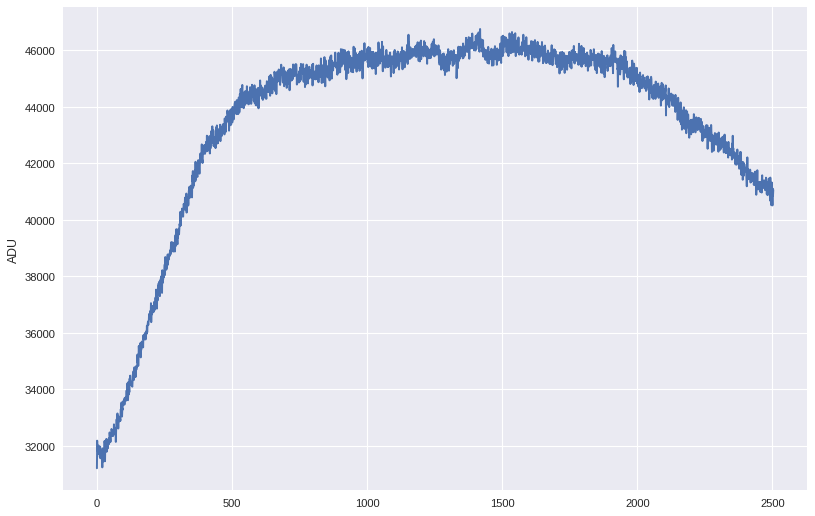

In [7]:
diagonal = np.diagonal(lum_filter_data)
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(diagonal)
plt.ylabel('ADU')
plt.show()